# Additional Comparative study Part -3


In [1]:
# importing Libraries
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score
import seaborn as sns
# to avoid warnings
import warnings 
warnings.filterwarnings('ignore')
# Repeated kfold for cross validation
from sklearn.model_selection import RepeatedKFold
# GridSearchCV for hyperparameters tuning
from sklearn.model_selection import GridSearchCV

In [2]:
# loading data
data = pd.read_csv("CE802_P3_Data.csv")
test = pd.read_csv('CE802_P3_Test.csv')

<AxesSubplot:xlabel='Target', ylabel='Density'>

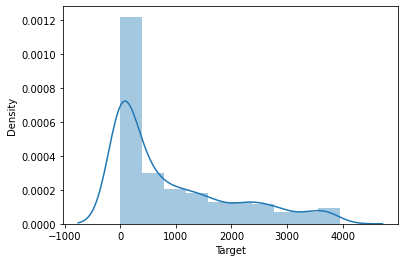

In [3]:
sns.distplot(data['Target'],bins=10)

In [4]:
# first 5 rows of data 
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.32,5.72,-13.83,High,UK,0.03,-200.46,122.09,-2.96,6,2.67,8,607.14,19.19,10523.40,-635.80,1051.99
1,-29.38,8.20,-11.07,Medium,UK,56.97,-427.78,74.25,-22.94,4,3.84,10,867.03,12.65,10037.04,-469.73,816.64
2,2.46,20.32,-7.59,Low,Rest,45.00,-329.02,96.98,-10.90,4,13.14,8,-153.66,13.01,15100.28,-662.31,3241.77
3,16.33,2.76,-8.40,High,Rest,0.12,-196.88,42.45,-12.16,12,1.29,6,1461.87,9.19,22518.15,-1100.35,0.00
4,-14.93,9.98,-5.28,Medium,USA,557.61,-249.50,76.25,-20.54,8,2.58,2,-433.89,18.44,20111.46,-752.48,0.00


In [5]:
# Hot encoding catagorical values
df = pd.get_dummies(data, columns=['F4','F5'])

In [6]:
# first 5 rows after encoding
df.head()

,F1,F2,F3,F6,F7,F8,F9,F10,F11,F12,...,Target,F4_High,F4_Low,F4_Medium,F4_Very high,F4_Very low,F5_Europe,F5_Rest,F5_UK,F5_USA
0,-39.32,5.72,-13.83,0.03,-200.46,122.09,-2.96,6,2.67,8,...,1051.99,1,0,0,0,0,0,0,1,0
1,-29.38,8.20,-11.07,56.97,-427.78,74.25,-22.94,4,3.84,10,...,816.64,0,0,1,0,0,0,0,1,0
2,2.46,20.32,-7.59,45.00,-329.02,96.98,-10.90,4,13.14,8,...,3241.77,0,1,0,0,0,0,1,0,0
3,16.33,2.76,-8.40,0.12,-196.88,42.45,-12.16,12,1.29,6,...,0.00,1,0,0,0,0,0,1,0,0
4,-14.93,9.98,-5.28,557.61,-249.50,76.25,-20.54,8,2.58,2,...,0.00,0,0,1,0,0,0,0,0,1


In [7]:
# setting Target column as last column
df = df[[c for c in df if c != 'Target'] + ['Target']]

In [8]:
# data after setting target as last column
df.head()

,F1,F2,F3,F6,F7,F8,F9,F10,F11,F12,...,F4_High,F4_Low,F4_Medium,F4_Very high,F4_Very low,F5_Europe,F5_Rest,F5_UK,F5_USA,Target
0,-39.32,5.72,-13.83,0.03,-200.46,122.09,-2.96,6,2.67,8,...,1,0,0,0,0,0,0,1,0,1051.99
1,-29.38,8.20,-11.07,56.97,-427.78,74.25,-22.94,4,3.84,10,...,0,0,1,0,0,0,0,1,0,816.64
2,2.46,20.32,-7.59,45.00,-329.02,96.98,-10.90,4,13.14,8,...,0,1,0,0,0,0,1,0,0,3241.77
3,16.33,2.76,-8.40,0.12,-196.88,42.45,-12.16,12,1.29,6,...,1,0,0,0,0,0,1,0,0,0.00
4,-14.93,9.98,-5.28,557.61,-249.50,76.25,-20.54,8,2.58,2,...,0,0,1,0,0,0,0,0,1,0.00


In [9]:
#checking null values
df.isnull().sum()

F1              0
F2              0
F3              0
F6              0
F7              0
F8              0
F9              0
F10             0
F11             0
F12             0
F13             0
F14             0
F15             0
F16             0
F4_High         0
F4_Low          0
F4_Medium       0
F4_Very high    0
F4_Very low     0
F5_Europe       0
F5_Rest         0
F5_UK           0
F5_USA          0
Target          0
dtype: int64

In [10]:
# checking test data
test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.37,4.22,-4.05,Very high,UK,83.43,-209.02,101.94,-17.16,2,7.89,10,2373.57,13.11,30843.16,-962.72,2307.406441
1,-39.37,7.72,-3.48,Very low,Rest,48.30,86.62,107.56,-11.00,18,1.86,10,1475.76,11.71,15657.13,-305.24,942.096178
2,16.25,7.08,-5.31,Very low,Europe,1.98,-267.34,23.33,-14.66,8,25.92,6,192.93,17.60,10765.05,-857.16,614.390166
3,23.08,5.82,-5.91,Very low,UK,11.49,-196.52,115.19,-12.14,2,12.87,0,2779.23,13.59,14778.80,-798.06,1766.561205
4,-21.30,15.14,-4.02,Medium,USA,0.60,-80.36,75.42,-8.86,10,4.26,8,-441.42,13.62,16328.25,-832.93,679.423193


In [11]:
# hot encoding test data
df_test = pd.get_dummies(test, columns=['F4','F5'])

In [12]:
# cheching hot encoded test data
df_test.head()

,F1,F2,F3,F6,F7,F8,F9,F10,F11,F12,...,Target,F4_High,F4_Low,F4_Medium,F4_Very high,F4_Very low,F5_Europe,F5_Rest,F5_UK,F5_USA
0,-39.37,4.22,-4.05,83.43,-209.02,101.94,-17.16,2,7.89,10,...,2307.406441,0,0,0,1,0,0,0,1,0
1,-39.37,7.72,-3.48,48.30,86.62,107.56,-11.00,18,1.86,10,...,942.096178,0,0,0,0,1,0,1,0,0
2,16.25,7.08,-5.31,1.98,-267.34,23.33,-14.66,8,25.92,6,...,614.390166,0,0,0,0,1,1,0,0,0
3,23.08,5.82,-5.91,11.49,-196.52,115.19,-12.14,2,12.87,0,...,1766.561205,0,0,0,0,1,0,0,1,0
4,-21.30,15.14,-4.02,0.60,-80.36,75.42,-8.86,10,4.26,8,...,679.423193,0,0,1,0,0,0,0,0,1


In [13]:
# setting Target column as last column in test set
df_test = df_test[[c for c in df if c != 'Target'] + ['Target']]

In [14]:
df_test.head()

,F1,F2,F3,F6,F7,F8,F9,F10,F11,F12,...,F4_High,F4_Low,F4_Medium,F4_Very high,F4_Very low,F5_Europe,F5_Rest,F5_UK,F5_USA,Target
0,-39.37,4.22,-4.05,83.43,-209.02,101.94,-17.16,2,7.89,10,...,0,0,0,1,0,0,0,1,0,2307.406441
1,-39.37,7.72,-3.48,48.30,86.62,107.56,-11.00,18,1.86,10,...,0,0,0,0,1,0,1,0,0,942.096178
2,16.25,7.08,-5.31,1.98,-267.34,23.33,-14.66,8,25.92,6,...,0,0,0,0,1,1,0,0,0,614.390166
3,23.08,5.82,-5.91,11.49,-196.52,115.19,-12.14,2,12.87,0,...,0,0,0,0,1,0,0,1,0,1766.561205
4,-21.30,15.14,-4.02,0.60,-80.36,75.42,-8.86,10,4.26,8,...,0,0,1,0,0,0,0,0,1,679.423193


In [15]:
# Normalising data
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
data1 = Scaler.fit_transform(df)
train_min = Scaler.data_min_[-1]
train_range = Scaler.data_range_[-1]
test_data_1 =Scaler.fit_transform(df_test)

In [16]:
# dividing the data
x = data1[:,:-1]      # features
y = data1[:,-1]   #target
# test set data division
X_test_set = test_data_1[:,:-1] # features 
Y_test_set = test_data_1[:,-1]    # target

In [35]:
# Train and Test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [37]:
# Performance Evaluation Metric = R2 Score
from sklearn.metrics import r2_score

# Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression

In [47]:
# define model
model = LinearRegression()
# define Cross validation for evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)
# define parameters
space = dict()

space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
# define GridSearch search
search = GridSearchCV(model, space, n_jobs=-1, cv=cv)
# fitting  search
result = search.fit(X_train, Y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7716964843303812
Best Hyperparameters: {'fit_intercept': False, 'normalize': True}


In [39]:
# Fitting Linear regression model for best hyper parameters
model_linear_regression = LinearRegression(fit_intercept= False, normalize= True )
model_linear_regression.fit(X_train,Y_train)

LinearRegression(fit_intercept=False, normalize=True)

In [40]:
# predicting from train set in Linear Regression
Train_prediction_Linear = model_linear_regression.predict(X_train)

In [41]:
# printing R2 score for train set in Linear Regression
print('R2_Score for Training in Linear Regression',r2_score(Y_train,Train_prediction_Linear))

R2_Score for Training in Linear Regression 0.7868181893650947


In [44]:
# predicting from evaluation set in Linear Regression
y_pred_linear_regression = model_linear_regression.predict(X_test)

In [45]:
# printing R2 score for evaluation set in Linear Regression
print('R2_Score for Test set in Linear regression',r2_score(Y_test, y_pred_linear_regression)*100)


R2_Score for Test set in Linear regression 79.7369126341785


# Support Vector Machine


In [60]:
# define model Support Vector regressor
from sklearn.svm import SVR
SVModel = SVR()


In [61]:
# parameters grid for Support vector regressor
parm = {'kernel':('linear','poly','rbf','sigmoid'),
       'C':[1,52,10],
       'degree':[3,8],
       'coef0':[0.001,10,0.5],
       'gamma':('auto','scale')}

In [62]:
# hyper parameter tuning using Grid Search for SVM
Grids = GridSearchCV(SVModel, parm, cv = RepeatedKFold(n_splits=10, n_repeats=3) )
#fitting model for grid search in SVM
Grids.fit(X_train,Y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=None),
             estimator=SVR(),
             param_grid={'C': [1, 52, 10], 'coef0': [0.001, 10, 0.5],
                         'degree': [3, 8], 'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')})

In [63]:
# best Score from grid search for SVM
Grids.best_score_

0.8741772234597438

In [64]:
# Best Hyper parameters for the SVM model 
Grids.best_params_

{'C': 52, 'coef0': 0.5, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}

In [65]:
# fitting model with best parameters in SVM
SVM_regression = SVR(C = 52, coef0 = 0.5, degree = 3, gamma = 'auto', kernel = 'poly')
SVM_regression.fit(X_train,Y_train)

SVR(C=52, coef0=0.5, gamma='auto', kernel='poly')

In [90]:
# predicting from evaluation set in SVM
y_pred_SVM_regression = SVM_regression.predict(X_test)

In [91]:
# R2 Score for Evaluation in SVM
print('R2-Score for SVM : ',r2_score(Y_test, y_pred_SVM_regression)*100)


R2-Score for SVM :  87.53952123052262


# K Nearest Neighbours

In [68]:
# define model for KNN
from sklearn.neighbors import KNeighborsRegressor
Knn_model = KNeighborsRegressor()

In [69]:
#Parameters grid for Knn
param_grid = {'algorithm': ['ball_tree','kd_tree','brute'],
             'leaf_size' : [2,4,6,8,10,12,14],
             'n_neighbors': [3,5,7,9,11,13,15],
             'weights': ['uniform','distance']} 


In [71]:
#Grid Search CV for hyper parameter tuining in KNN
knn_grid_search=GridSearchCV(Knn_model,param_grid,cv=10)
#Fitting model for grid Search in KNN
knn_grid_search.fit(X_train,Y_train)


GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [2, 4, 6, 8, 10, 12, 14],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']})

In [95]:
# Best Parms for KNN 
knn_grid_search.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 2,
 'n_neighbors': 5,
 'weights': 'distance'}

In [101]:
# Best score for KNN
knn_grid_search.best_score_

0.5020891335183902

In [98]:
# Fitting knn model for best params
KNN_regressor = KNeighborsRegressor(algorithm = 'ball_tree', leaf_size = 2, n_neighbors = 5, weights = 'distance')
KNN_regressor.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=2, weights='distance')

In [99]:
# predicting from evaluation set in KNN
y_pred_knn = KNN_regressor.predict(X_test)

In [100]:
# R2 Score for evaluation set in KNN
print('R2 Score for evaluation in KNN',r2_score(Y_test, y_pred_knn)*100)


R2 Score for evaluation in KNN 52.529914660351906


# Random Forest

In [75]:
# define model for Random Forest
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()

In [77]:
# Hyper parameters for grid search
grid_random = {'n_estimators':[1,2,3,4,5,6,7,8,9,10],
               'criterion' : ["mse", "mae"],
               'max_features':['auto', 'sqrt', 'log2'],
               
              }

In [78]:
# Cross validation set
cvr = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)


In [94]:
# Grid search for Random Forest
searchr = GridSearchCV(regr,grid_random , n_jobs=-1, cv=cvr)
# fitting model for Grid Search
searchr.fit(X_train,Y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [82]:
# best parameters for Random Forest model
searchr.best_params_

{'criterion': 'mse', 'max_features': 'auto', 'n_estimators': 9}

In [83]:
# best score from grid search
searchr.best_score_

0.6249245308845696

In [105]:
# Fitting  Random Forest model with best parameeters
Random_forest = RandomForestRegressor(criterion = 'mse', max_features = 'auto', n_estimators = 9)
Random_forest.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=9)

In [86]:
# Predicting from Evaluation set in Random Forest
Random_forest_predictions = Random_forest.predict(X_test)

In [106]:
# R2 Score for Evaluation in Random Forest
print("R2 Score for Random Forest Regressor : ",r2_score(Y_test,Random_forest_predictions )*100)

R2 Score for Random Forest Regressor :  62.79849067294685


### Prediction on a hold out Test Set Values from the best model

In [109]:
# predicting from SVM model
Test_predictions = SVM_regression.predict(X_test_set)

In [110]:
# Scale back target
Test_predictions_target = Test_predictions *train_range + train_min 


In [146]:
# Converting array to series
Predictions_deployment = pd.Series(Test_predictions_target)

In [147]:
Predictions_deployment[Predictions_deployment < 1] = 0

In [148]:
# Replacing Target Values with predicted targets
test["Target"] = Predictions_deployment

In [149]:
test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.37,4.22,-4.05,Very high,UK,83.43,-209.02,101.94,-17.16,2,7.89,10,2373.57,13.11,30843.16,-962.72,2307.406441
1,-39.37,7.72,-3.48,Very low,Rest,48.30,86.62,107.56,-11.00,18,1.86,10,1475.76,11.71,15657.13,-305.24,942.096178
2,16.25,7.08,-5.31,Very low,Europe,1.98,-267.34,23.33,-14.66,8,25.92,6,192.93,17.60,10765.05,-857.16,614.390166
3,23.08,5.82,-5.91,Very low,UK,11.49,-196.52,115.19,-12.14,2,12.87,0,2779.23,13.59,14778.80,-798.06,1766.561205
4,-21.30,15.14,-4.02,Medium,USA,0.60,-80.36,75.42,-8.86,10,4.26,8,-441.42,13.62,16328.25,-832.93,679.423193


In [150]:
# Converting To CSV file
test.to_csv('CE802_P3_Test.csv',index = False)